# Week 06 Handson - Text Classifier
In this week hands-on, we will create a sentiment analyzer on twitter using the concept of classification and text pre-processing that we have learned before. We will cover:<br>
a. text pre-processing,<br>
b. splitting data for training & testing and converting them into numerical features,<br>
c. training a classifier model and perform predictions on testing dataset,<br>
d. Evaluating performance of algorithm<br>

## Read dataset "tweets.csv"

In [2]:
import numpy as np
import pandas as pd

tweets = pd.read_csv('./tweets.csv', sep=",")# adjust with your own path
tweets.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1038,1,Sentiment140,that film is fantastic #brilliant
1,1804,1,Sentiment140,this music is really bad #myband
2,1693,0,Sentiment140,winter is terrible #thumbs-down
3,1477,0,Sentiment140,this game is awful #nightmare
4,45,1,Sentiment140,I love jam #loveit


## Milestone 01 (W01)
The given dataset is still a 'raw dataset' which includes some unwanted features, unwanted characters, etc.<br>
a. Select the `SentimentText` column as an attribute and the `Sentiment` column as a label (ground truth) for this study case<br><br>
b. In this M01.b, you have been provided a function template `pre_process` (see below) to perform all the pre-processing step to the all tweet data in the dataset. Complete pre-process function with all techniques that you have learned in the previous hands-on week (W03) for text pre-processing, so the all text attributes can be converted to `pre-processed text`, e.g., after being applied by: (i) tokenization, (ii) normalization, (iii) cleaning, (iv) stemming or lemmatization. Here, you will get `list of words`.<br><br>
c. Use the function that you have completed in M01.b, looped for each data row of `SentimentText` column. For each looping, you will get `list of words`. Append this `list of words` for each looping result in to list, so, will get `list of list`.<br><br>

d. Split (random & stratified) `list of list` you get in M01.c into `training data` and `testing data`. The testing dataset must be 20% from overall dataset. Print the total number of initial dataset, total number of training dataset and testing dataset. <br>


In [4]:
#put your code here for M01.a
data = tweets['SentimentText'].tolist()
label = tweets['Sentiment'].tolist()

In [5]:
#put your code here for M01.b
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def pre_process(input_ori):
    '''
    Write code implementation for text pre-processing here. 
    Use what you have learned before about text pre-processing.
    
    Parameter:
    input_ori = raw data text (single tweet data)
    
    Return value:
    processed_tweet = 'list of words'
    
    
    '''
    #Tokenization
    tokens = word_tokenize(input_ori)
    
    #Convert to Lower Case
    normalized_words = [w.lower() for w in tokens]
    
    #Cleaning 01: Remove Punctuation
    table = str.maketrans('', '', string.punctuation)
    punc_removed = [w.translate(table) for w in normalized_words]
    
    #Cleaning 02: Remove Not Alphabetic
    isalpha_words = [word for word in punc_removed if word.isalpha()]
    
    #Cleaning 03: Remove Stop Words
    stop_words = set(stopwords.words('english'))
    stopWords_removed = [w for w in isalpha_words if not w in stop_words]
    
    #Stemming
    ps = PorterStemmer()
    stemmed_word = [ps.stem(w) for w in stopWords_removed]
    
    processed_tweet = stemmed_word
    
    return processed_tweet

In [9]:
#put your code here for M01.c
preprocessed_data = []

for tweet in data:
    preprocessed_data.append(pre_process(tweet))

In [12]:
print(preprocessed_data[0])

['film', 'fantast', 'brilliant']


In [28]:
#put your code here for M01.d
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, train_size=0.8,  test_size=0.2, random_state=0)

training_data = []
training_label = []

testing_data = []
testing_label = []

for train_index, test_index in sss.split(preprocessed_data, label):
    for index in train_index:
        training_data.append(preprocessed_data[index])
        training_label.append(label[index])
    
    for index in test_index:
        testing_data.append(preprocessed_data[index])
        testing_label.append(label[index])

print("original: ", len(preprocessed_data), len(label))
print("training: ", len(training_data), len(training_label))
print("testing: ", len(testing_data), len(testing_label))

original:  1932 1932
training:  1545 1545
testing:  387 387


## M02
a. Build `tfidf_model` by using codes below with `training data` you get in M01.d. (`TfidfVectorizer` is from scikit-learn)
```
def dummy(doc):
    return doc
tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy,
    preprocessor=dummy,
    token_pattern=None)
```
b. Transform `training data` and `testing data` you get in M01.d by using `tfidf_model` you get in M02.a. In this case, you will get numerical features, both from `training data` and `testing data`.<br><br>
c. Choose a classification algorithm (you may use library such as scikit-learn), and explain why you choose it.<br><br>
d. Train the classifier model, based on the algorithm you have chosen, by using numerical features of `training data` from M02.b.<br><br>
e. Make predictions on the numerical features of `testing dataset` you get in M02.b using the classifier model that you have trained.

In [29]:
# put your code here for M02.a
from sklearn.feature_extraction.text import TfidfVectorizer
def dummy(doc):
    return doc
tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy,
    preprocessor=dummy,
    token_pattern=None)
model = tfidf.fit(training_data)

In [30]:
# put your code here for M02.b
num_training_data = model.transform(training_data).toarray()
num_testing_data = model.transform(testing_data).toarray()

Your explanation (M02.c):<br>
Logistic Regression<br>
1. Karena label berupa binary (true/false)<br>
2. Dan karena pada X terdapat fitur yang dapat menjelaskan mengapa tweet tersebut label tertentu. Misal pada X ada fitur "jelek" maka akan lebih cenderung ke sentimen negatif

In [31]:
# put your code here for M02.d
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(num_training_data, training_label)

LogisticRegression()

In [32]:
# put your code here for M02.e
y_pred = lr.predict(num_testing_data)

## M03
After train the classification model and make prediction using that model, now you will evaluate the performance of your model against testing dataset.<br>
a. Calculate and print the accuracy of your model's predictions in M02.e against testing dataset ground truth<br>
b. What you can infer based on the result?<br>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = []
# Display confusion matrix
def confusion_matrix(classifier, x, y, title):
    disp = plot_confusion_matrix(classifier, x, y, cmap=plt.cm.Blues,normalize='true')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()

accuracy:  0.9741602067183462
f1 score:  0.9740932642487047
Confusion Matrix
[[0.96410256 0.03589744]
 [0.015625   0.984375  ]]


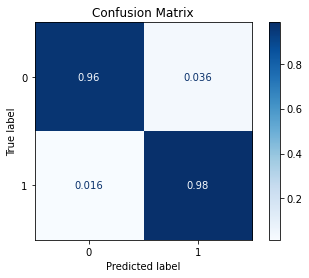

In [41]:
#put your code here for Q03.a
from sklearn.metrics import accuracy_score, f1_score

print("accuracy: ", accuracy_score(testing_label, y_pred))
print("f1 score: ", f1_score(testing_label, y_pred, average=None)[0])
confusion_matrix(lr, num_testing_data, testing_label, "Confusion Matrix")

Your answer (M03.b) :<br>
1. Preprocessing yang dilakukan sangat sederhana namun dapat menghasilkan akurasi yang memuaskan. Hal ini menandakan bahwa raw data sudah memiliki kata-kata yang lengkap (minim singkatan dan minim typo)<br>
2. Logistic Regression cukup efektif dalam mengklasifikasi masalah sentimen analisis